<a href="https://colab.research.google.com/github/vishwajeet-hogale/IPO-rep/blob/main/SentiMentIPOZomatoIPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip3 install newspaper3k
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 37.3 MB/s 


In [24]:
import pandas as pd
from newspaper import Article
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
links1 =['https://www.bloombergquint.com/business/zomato-ipo-pandemic-gave-a-boost-will-it-last','https://www.indmoney.com/articles/zomato-ipo-zomato-ipo-date-price-lot-size-review-more-details','https://www.thehindubusinessline.com/markets/stock-markets/zomato-ipo-will-open-floodgates-for-other-start-ups-bikhchandani/article35514248.ece','https://www.financialexpress.com/market/zomato-stock-market-live-ipo-share-listing-23-july-2021-online-food-ordering-food-tech-unicorn-bse-nse-dalal-street-grey-market-premium/2296040/','https://www.moneycontrol.com/news/business/ipo/zomato-ipo-listing-food-delivery-giant-sees-strong-stock-market-debut-lists-at-rs-116-7210471.html','https://economictimes.indiatimes.com/markets/ipos/fpos/zomato-lists-at-53-premium-over-issue-price-enters-elite-club-of-top-100-cos-by-market-value/articleshow/84666820.cms','https://www.moneycontrol.com/news/business/markets/zomato-ipo-listing-retail-investors-gained-but-info-edge-and-founder-deepinder-goyal-made-a-fortune-7213751.html','https://www.ndtv.com/india-news/deepinder-goyal-stake-in-zomato-is-now-worth-650-million-2493338','https://www.bloombergquint.com/business/zomato-ipo-co-founders-senior-executives-a-badminton-player-among-zomato-millionaires','https://economictimes.indiatimes.com/markets/ipos/fpos/zomato-listing-on-friday-grey-market-premium-climbs-to-35/articleshow/84629841.cms','https://indianexpress.com/article/business/bumper-debut-for-zomato-m-cap-races-past-rs-1-lakh-cr-7418500/']

body =[]
for ur in links1 :
    article = Article(ur)
    article.download()
    article.parse()
    body.append(article.text)
df = pd.DataFrame({"Text":body})


 


In [6]:
df

,Text
0,The complete lockdown to contain the first wav...
1,"Zomato is set to raise up to Rs 9,375 crore vi..."
2,After witnessing a stellar debut on the stock ...
3,Zomato ended the initial day of trade on the s...
4,live bse live\n\nnse live Volume Todays L/H Mo...
5,NEW DELHI: Zomato scripted history on Friday b...
6,live bse live\n\nnse live Volume Todays L/H Mo...
7,Deepinder Goyal is the founder of Zomato.\n\nA...
8,Co-founders to top executives of Zomato Ltd. w...
9,New Delhi: Food delivery platform Zomato is li...


In [9]:
# import nltk
# from nltk.corpus import stopwords
# nltk.download("stopwords")
# print(stopwords.words('english'))
# stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [17]:

stopwords = set(STOPWORDS) 

def WordCloudForSentiments (corpus, title):
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey',
                          stopwords = stopwords,  min_font_size = 10).generate(corpus)

    plt.figure(figsize = (12, 12), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud:  ' + title)
    plt.tight_layout(pad = 0) 

    plt.show()

In [18]:
Corpus = ''
for article in df['Text']:
    Corpus +=  (article + ' ') 

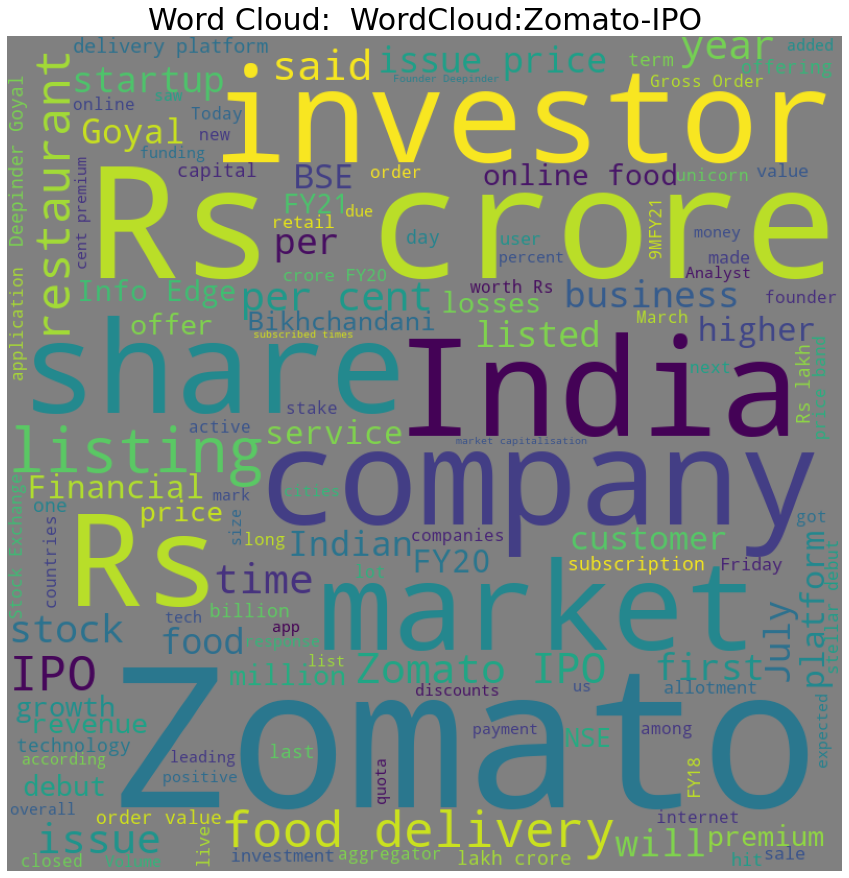

In [19]:
WordCloudForSentiments( ''.join(Corpus),'WordCloud:Zomato-IPO' )

In [54]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# analyzer = SentimentIntensityAnalyzer()
# for sentence in df['Text']:
#     if len(sentence)==0:
#       continue
#     sentiment_dict = analyzer.polarity_scores(sentence)
#     print("Overall sentiment dictionary is : ", sentiment_dict)
#     print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
#     print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
#     print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

In [55]:
cat = {0:'negative',2:'positive',1:'neutral'}
scores = {0:0,1:0,2:0}
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def SentimentAnlysis(sentence):
    sentAnalyzer = SentimentIntensityAnalyzer() 
    sentDict = sentAnalyzer.polarity_scores(sentence)
    all_scores = list(sentDict.values())[0:3]

    # print(all_scores)
    val = max(all_scores)
    index = all_scores.index(val)
    # print(val,index)
    scores[0] += all_scores[0]
    scores[2] += all_scores[2]
    scores[1] += all_scores[1]
    
    return cat[index]

In [56]:
from tqdm import tqdm
sentiment = []

for article in  tqdm (df['Text']):
    sentiment.append(SentimentAnlysis(article))
print(scores)

100%|██████████| 11/11 [00:00<00:00, 58.79it/s]

{0: 0.214, 1: 9.741999999999999, 2: 1.043}


In [57]:
df['Sentiments'] = sentiment

In [58]:
df

,Text,Sentiments
0,The complete lockdown to contain the first wav...,neutral
1,"Zomato is set to raise up to Rs 9,375 crore vi...",neutral
2,After witnessing a stellar debut on the stock ...,neutral
3,Zomato ended the initial day of trade on the s...,neutral
4,live bse live\n\nnse live Volume Todays L/H Mo...,neutral
5,NEW DELHI: Zomato scripted history on Friday b...,neutral
6,live bse live\n\nnse live Volume Todays L/H Mo...,neutral
7,Deepinder Goyal is the founder of Zomato.\n\nA...,neutral
8,Co-founders to top executives of Zomato Ltd. w...,neutral
9,New Delhi: Food delivery platform Zomato is li...,neutral


Text(0.5, 1.0, 'Sentiments on Zomato IPO')

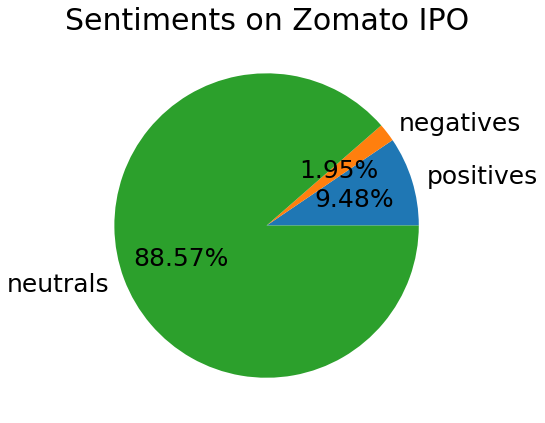

In [60]:
# numPostives = len(df[df['Sentiments'] == 'positive'])
# numNegatives = len(df[df['Sentiments'] == 'negative'])
# numNeutrals  = len(df[df['Sentiments'] == 'neutral'])
numPostives = scores[2]
numNegatives = scores[0]
numNeutrals  =scores[1]
plt.figure(figsize = (7, 7))
plt.pie([numPostives, numNegatives, numNeutrals], labels = ['positives', 'negatives', 'neutrals'], autopct='%1.2f%%')
plt.title('Sentiments on Zomato IPO')